In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widget
from IPython import display
from os import listdir
from os.path import isfile, join
import glob
from skimage.feature import hog

%matplotlib inline

In [ ]:
fname = 'non-vehicles/GTI/image{}.png'.format(9)
image = mpimg.imread(fname)
# Define a function to compute color histogram features  
def color_hist(img, nbins=10):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(image[:,:,0], bins=nbins)
    ghist = np.histogram(image[:,:,1], bins=nbins)
    bhist = np.histogram(image[:,:,2], bins=nbins)
    # Generating bin centers
    #bin_centers = None
    # Concatenate the histograms into a single feature vector
    #hist_features = None
    # Return the individual histograms, bin_centers and feature vector
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    #print(bin_centers)
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    return rhist, ghist, bhist, bin_centers, hist_features
    
rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=50)

# Plot a figure with all three bar charts
if rh is not None:
    fig = plt.figure(figsize=(10,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 2)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 2)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 2)
    plt.title('B Histogram')
    fig.tight_layout()
else:
    print('Your function is returning None for at least one variable...')

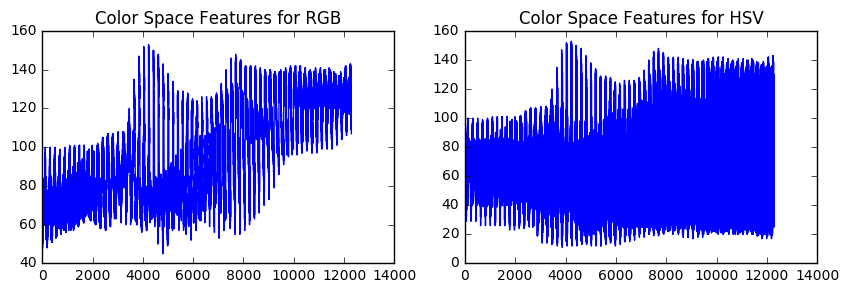

In [3]:
from mpl_toolkits.mplot3d import Axes3D

# def plot3d(pixels, colors_rgb,
#         axis_labels=list("RGB"), axis_limits=[(0, 255), (0, 255), (0, 255)]):
#     """Plot pixels in 3D."""

#     # Create figure and 3D axes
#     fig = plt.figure(figsize=(8, 8))
#     ax = Axes3D(fig)

#     # Set axis limits
#     ax.set_xlim(*axis_limits[0])
#     ax.set_ylim(*axis_limits[1])
#     ax.set_zlim(*axis_limits[2])

#     # Set axis labels and sizes
#     ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
#     ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
#     ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
#     ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

#     # Plot pixel values with colors given in colors_rgb
#     ax.scatter(
#         pixels[:, :, 0].ravel(),
#         pixels[:, :, 1].ravel(),
#         pixels[:, :, 2].ravel(),
#         c=colors_rgb.reshape((-1, 3)), edgecolors='none')

#     return ax  # return Axes3D object for further manipulation


# Read a color image
fname = 'non-vehicles/GTI/image{}.png'.format(9)
#fname = 'vehicles/GTI_Far/image000{}.png'.format(9)
img = cv2.imread(fname)
# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

# Plot and show
# plot3d(img_small_RGB, img_small_rgb)
# plt.show()

# plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
# plt.show()
fig = plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(img_small_RGB.ravel() )
plt.title('Color Space Features for RGB')
plt.subplot(122)
plt.plot(img_small_HSV.ravel() )
plt.title('Color Space Features for HSV')

In [ ]:

# Read a color image
fname = 'non-vehicles/GTI/image{}.png'.format(5)
#fname = 'vehicles/GTI_Far/image000{}.png'.format(6)
image = cv2.imread(fname)


# Define a function to compute color histogram features  
# Pass the color_space flag as 3-letter all caps string
# like 'HSV' or 'LUV' etc.
# KEEP IN MIND IF YOU DECIDE TO USE THIS FUNCTION LATER
# IN YOUR PROJECT THAT IF YOU READ THE IMAGE WITH 
# cv2.imread() INSTEAD YOU START WITH BGR COLOR!
def bin_spatial(img, color_space='RGB', size=(32, 32)):
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)             
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(feature_image, size).ravel() 
    # Return the feature vector
    return features
    
feature_vec1 = bin_spatial(image, color_space='YCrCb', size=(32, 32))
feature_vec12 = bin_spatial(image, color_space='HSV', size=(32, 32))
feature_vec123 = bin_spatial(image, color_space='LUV', size=(32, 32))

# Plot features
fig = plt.figure(figsize=(20,3))
plt.subplot(131)
plt.plot(feature_vec1 )
plt.title('Spatially Binned Features for YcrCb')
plt.subplot(132)
plt.plot(feature_vec12 )
plt.title('Spatially Binned Features for HSV')
plt.subplot(133)
plt.plot(feature_vec123 )
plt.title('Spatially Binned Features for Luv')

feature_vec1 = bin_spatial(image, color_space='RGB', size=(32, 32))
feature_vec12 = bin_spatial(image, color_space='YUV', size=(32, 32))
feature_vec123 = bin_spatial(image, color_space='YCrCb', size=(32, 32))
fig = plt.figure(figsize=(20,3))
plt.subplot(131)
plt.plot(feature_vec1 )
plt.title('Spatially Binned Features for RGB')
plt.subplot(132)
plt.plot(feature_vec12 )
plt.title('Spatially Binned Features for YUV')
plt.subplot(133)
plt.plot(feature_vec123 )
plt.title('Spatially Binned Features for YrCrb')

In [ ]:
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                                  visualise=True, feature_vector=False)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                       visualise=False, feature_vector=feature_vec)
        hog_image = img
        
        return features,hog_image
    
    
# Read a color image
#fname = 'non-vehicles/GTI/image{}.png'.format(4)
fname = 'vehicles/GTI_Far/image000{}.png'.format(6)
image = cv2.imread(fname)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
orient = 8
pix_per_cell =8
cell_per_block = 2
# Call our function with vis=True to see an image output
features,hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=True)


# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')